<a href="https://colab.research.google.com/github/hanunnisanurr/rockpaperscissors/blob/main/Proyek_Akhir_Hanunnisa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Submission Proyek Akhir - Belajar Machine Learning untuk Pemula

Nama : Hanunnisa Nur Rahmahyanti

Domisili : Purwokerto, Jawa Tengah

Email : hanunnisa22@gmail.com

In [ ]:
import tensorflow as tf

!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
-O /tmp/rock_paper_scissors.zip

import zipfile,os
local_zip = '/tmp/rock_paper_scissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/rockpaperscissors/rps-cv-images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

--2021-05-18 10:21:01--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rock_paper_scissors.zip’

/tmp/rock_paper_sci 100%[===================>] 307.92M   869KB/s    in 4m 37s  

2021-05-18 10:25:39 (1.11 MB/s) - ‘/tmp/rock_paper_scissors.zip’ saved [322873683/322873683]



In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    vertical_flip= True,
                    shear_range=0.2,
                    fill_mode='nearest',
                    validation_split=0.4)

train_generator = datagen.flow_from_directory(
        base_dir,
        target_size=(150, 150), 
        batch_size=4,
        class_mode='categorical',
        subset='training')

validation_generator = datagen.flow_from_directory(
        base_dir, 
        target_size=(150,150),
        batch_size=4,
        class_mode='categorical',
        subset='validation')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# meng-compile model dengan 'Adam' optimizer loss function 'categorical_crossentropy'
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

# melatih model dengan model.fit
model.fit(
    train_generator,
    steps_per_epoch=40,
    epochs=20,
    validation_data = validation_generator,
    validation_steps=8,
    verbose=2,
)


Epoch 1/20
40/40 - 9s - loss: 1.1224 - accuracy: 0.3165 - val_loss: 1.0971 - val_accuracy: 0.1875
Epoch 2/20
40/40 - 8s - loss: 1.0652 - accuracy: 0.4250 - val_loss: 0.8656 - val_accuracy: 0.5938
Epoch 3/20
40/40 - 8s - loss: 0.7324 - accuracy: 0.6812 - val_loss: 0.3909 - val_accuracy: 0.8750
Epoch 4/20
40/40 - 8s - loss: 0.6221 - accuracy: 0.7688 - val_loss: 0.4465 - val_accuracy: 0.8438
Epoch 5/20
40/40 - 8s - loss: 0.3305 - accuracy: 0.8938 - val_loss: 0.9552 - val_accuracy: 0.6562
Epoch 6/20
40/40 - 8s - loss: 0.6023 - accuracy: 0.8000 - val_loss: 0.5974 - val_accuracy: 0.8750
Epoch 7/20
40/40 - 8s - loss: 0.6177 - accuracy: 0.7875 - val_loss: 0.4062 - val_accuracy: 0.8125
Epoch 8/20
40/40 - 8s - loss: 0.3340 - accuracy: 0.9062 - val_loss: 0.2925 - val_accuracy: 0.9062
Epoch 9/20
40/40 - 8s - loss: 0.3221 - accuracy: 0.8750 - val_loss: 0.2514 - val_accuracy: 0.9688
Epoch 10/20
40/40 - 8s - loss: 0.2757 - accuracy: 0.8813 - val_loss: 0.0872 - val_accuracy: 1.0000
Epoch 11/20
40/40 -

Saving IMG-20210518-WA0021.jpg to IMG-20210518-WA0021 (1).jpg
IMG-20210518-WA0021.jpg
It's Paper


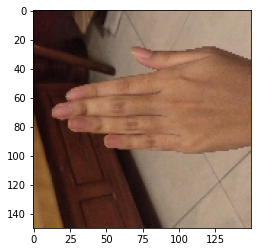

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
  # memprediksi images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]==1:
    print("It's Paper")
  elif classes[0,1]==1:
    print("It's Rock")
  else:
    print("It's Scissors")